In [34]:
%matplotlib inline
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

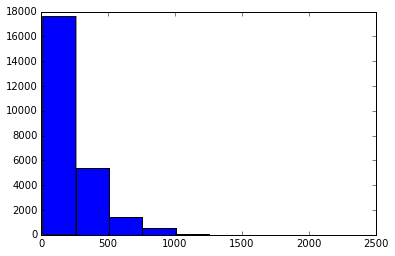

In [36]:
# load the dataset
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
result = map(len, X_train)
plt.hist(result)
plt.show()

In [37]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [38]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print(model.summary())


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_6 (Embedding)          (None, 500, 32)       160000      embedding_input_6[0][0]          
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 16000)         0           embedding_6[0][0]                
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 250)           4000250     flatten_2[0][0]                  
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 1)             251         dense_3[0][0]                    
Total params: 4160501
_____________________________________________________________________

In [39]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128,verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 23s - loss: 0.5148 - acc: 0.7014 - val_loss: 0.3079 - val_acc: 0.8670
Epoch 2/2
25000/25000 [==============================] - 23s - loss: 0.1986 - acc: 0.9259 - val_loss: 0.3068 - val_acc: 0.8732
Accuracy: 87.32%
